In [210]:
# ------------------------------
# Data Manipulation & Analysis
# ------------------------------
import pandas as pd                         
from collections import Counter             

# ------------------------------
# Visualization
# ------------------------------
import matplotlib.pyplot as plt             
import seaborn as sns                       

# ------------------------------
# Machine Learning & Modeling
# ------------------------------
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler       
from sklearn.feature_extraction.text import TfidfVectorizer  

# Classifiers
from sklearn.linear_model import LogisticRegression     
from sklearn.ensemble import RandomForestClassifier    
from sklearn.svm import SVC                             
from sklearn.ensemble import VotingClassifier           
import xgboost as xgb                                   

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.model_selection import GridSearchCV         

# ------------------------------
# Text Processing & NLP
# ------------------------------
import nltk                                               
from nltk.corpus import stopwords                         
from nltk.sentiment.vader import SentimentIntensityAnalyzer  

# Named Entity Recognition (NER) and linguistic analysis
import spacy                                               

# ------------------------------
# Geolocation & Country Lookup
# ------------------------------
import pycountry                                           

# ------------------------------
# Warnings
# ------------------------------
import warnings                                            
warnings.filterwarnings('ignore')

# ------------------------------
# JSON Handling (for text extraction)
# ------------------------------
import json                                              


In [211]:

t_df = pd.read_csv('../data/travel_subreddit_cleaned_posts.csv')
th_df = pd.read_csv('../data/travelhacks_subreddit_cleaned_posts.csv')
# Combine them into one DataFrame
df = pd.concat([t_df, th_df], ignore_index=True)
# Save the merged DataFrame to a csv file
df.to_csv('combined_travel_data.csv', index=False)
print("Files merged successfully!")


Files merged successfully!


In [212]:
t_df.shape

(1103, 8)

In [213]:
th_df.shape

(1007, 8)

In [214]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2110 non-null   object 
 1   created_utc   2110 non-null   float64
 2   title         2110 non-null   object 
 3   author        2032 non-null   object 
 4   selftext      1431 non-null   object 
 5   num_comments  2110 non-null   int64  
 6   score         2110 non-null   int64  
 7   subreddit     2110 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 132.0+ KB


In [216]:
df['subreddit'].unique()

array(['travel', 'TravelHacks'], dtype=object)

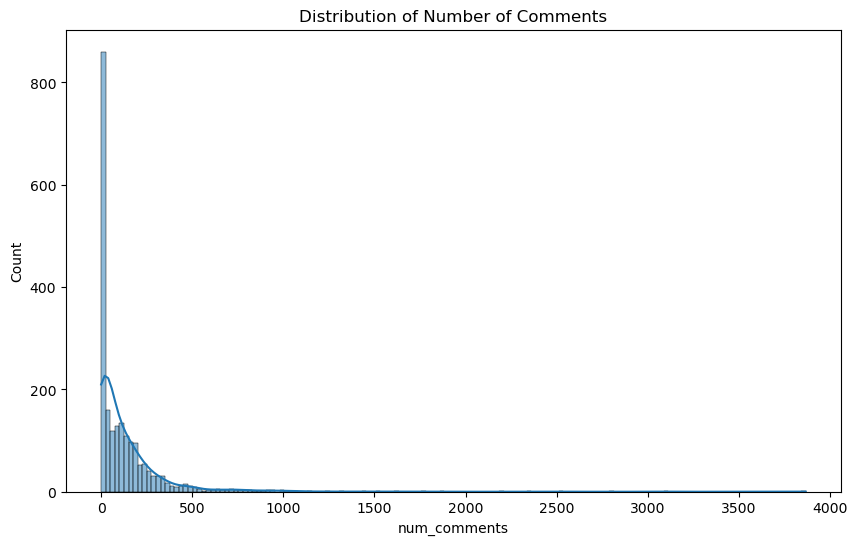

In [217]:

plt.figure(figsize=(10, 6))
sns.histplot(df['num_comments'], kde=True)
plt.title('Distribution of Number of Comments')
plt.show()


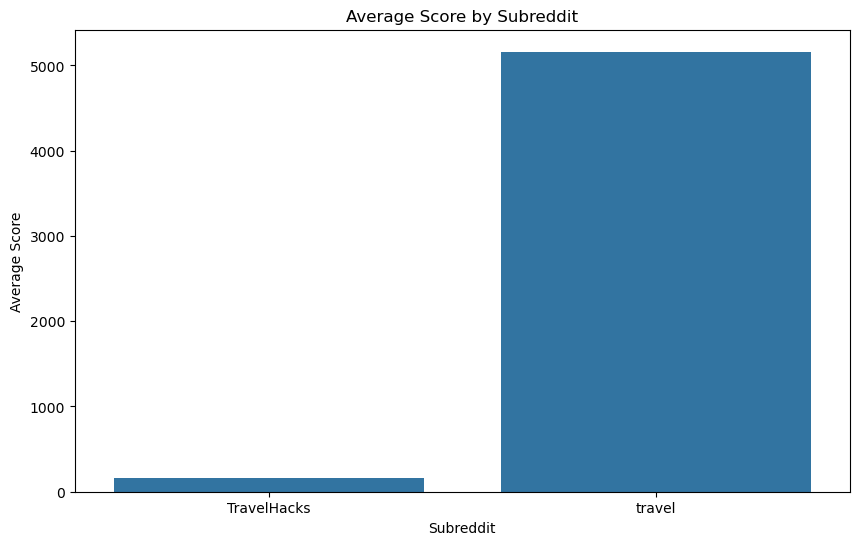

In [218]:

avg_score_by_subreddit = df.groupby('subreddit')['score'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_score_by_subreddit.index, y=avg_score_by_subreddit.values, ci=None)
plt.title('Average Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Score')
plt.show()


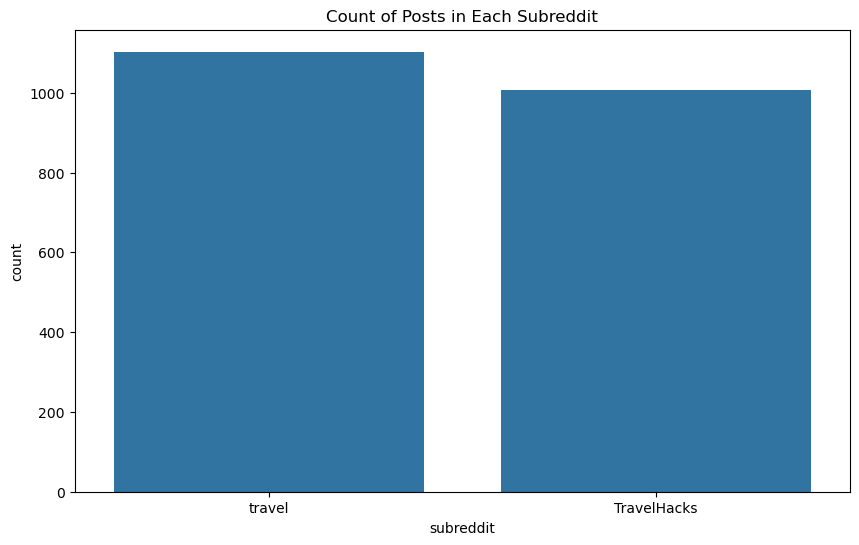

In [219]:

plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=df)
plt.title('Count of Posts in Each Subreddit')
plt.show()


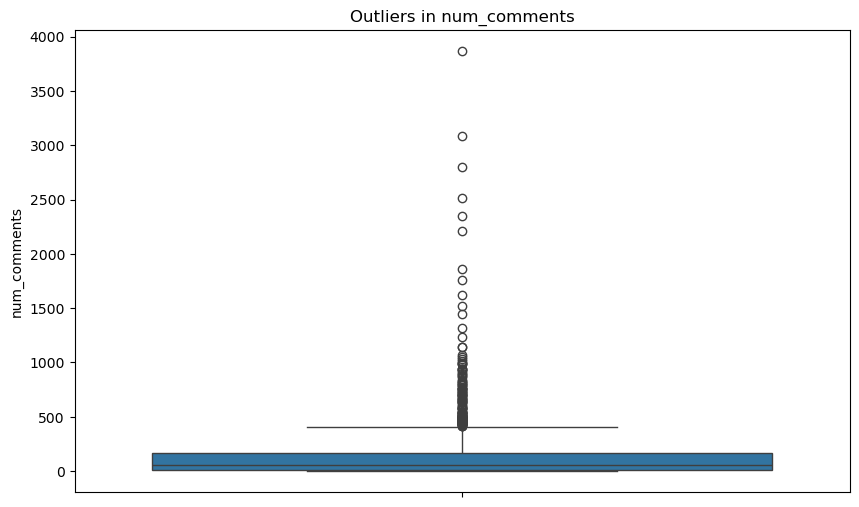

In [220]:

# Boxplots can help visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['num_comments'])
plt.title('Outliers in num_comments')
plt.show()


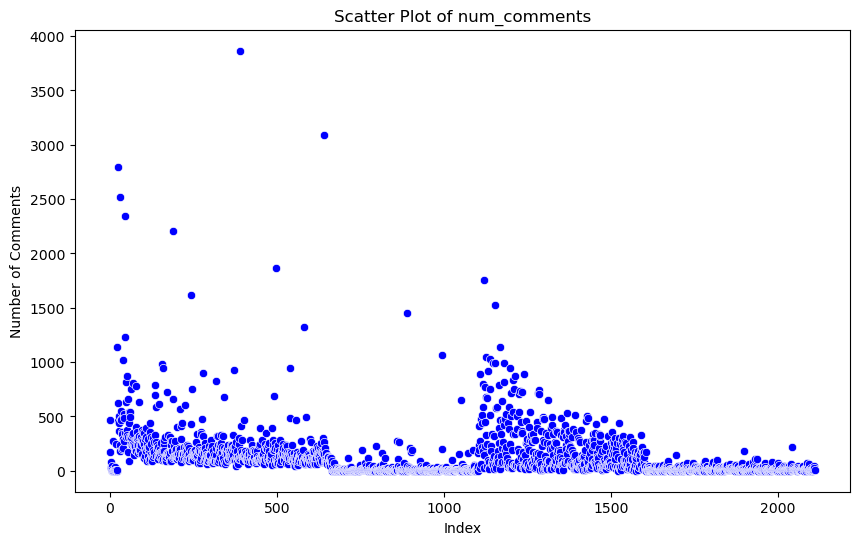

In [221]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['num_comments'], color='blue')
plt.title('Scatter Plot of num_comments')
plt.xlabel('Index')
plt.ylabel('Number of Comments')
plt.show()


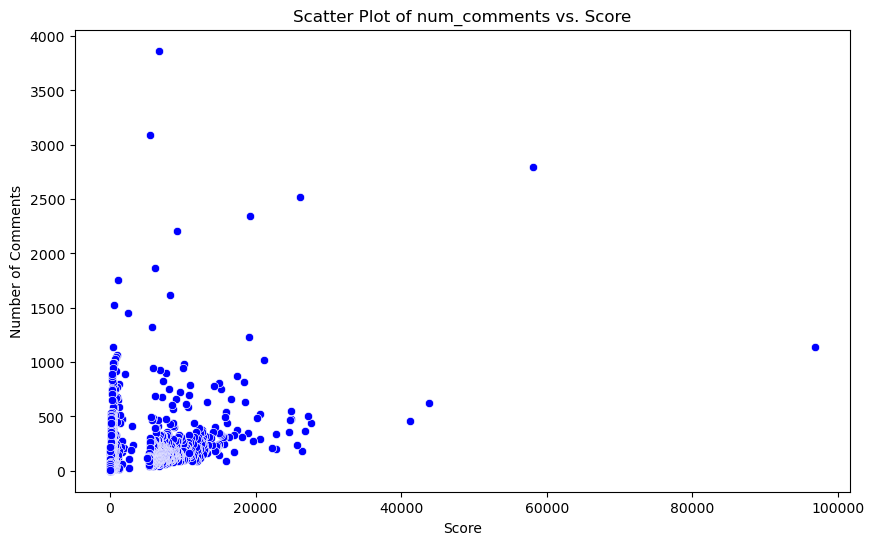

In [222]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['score'], y=df['num_comments'], color='blue')
plt.title('Scatter Plot of num_comments vs. Score')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.show()

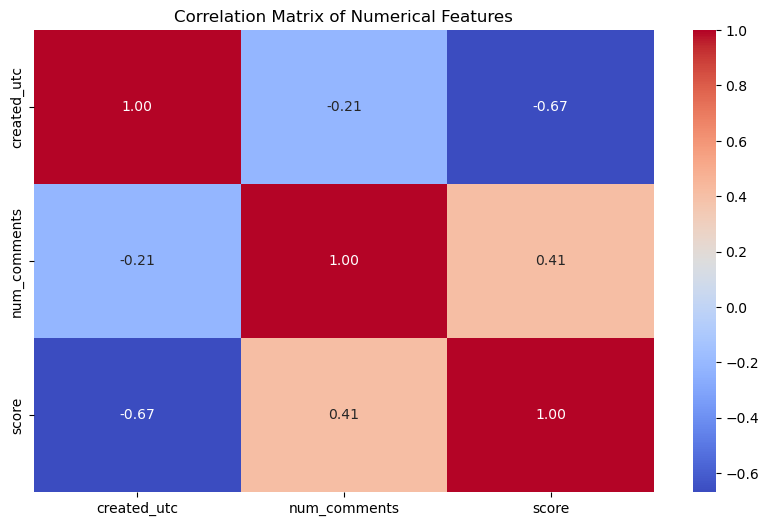

In [244]:

# Select numerical columns for correlation
num_cols = ['created_utc', 'num_comments', 'score']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


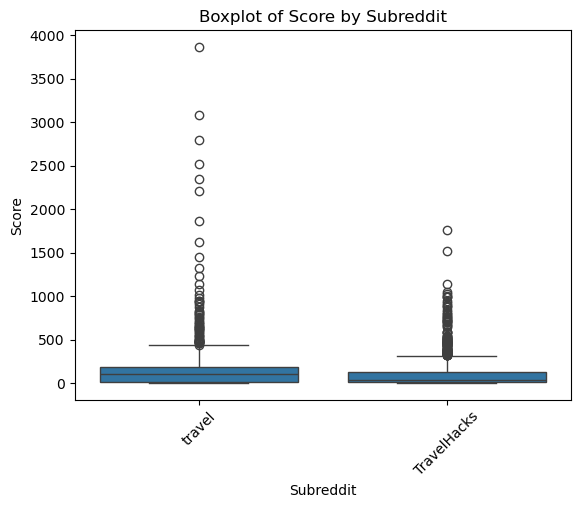

In [224]:

# Boxplot comparing scores across different subreddits
sns.boxplot(x='subreddit', y='num_comments', data=df)
plt.title('Boxplot of Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [225]:

df['subreddit'].unique()


array(['travel', 'TravelHacks'], dtype=object)

In [226]:

# Convert the 'subreddit' column to lowercase
df['subreddit'] = df['subreddit'].str.lower()
# Map 'travel' to 1 and 'travelhacks' to 0
df['subreddit'] = df['subreddit'].map({'travel': 1, 'travelhacks': 0})
# Convert 'subreddit' column to integer type
df['subreddit'] = df['subreddit'].astype(int)
# Display the DataFrame
df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1


In [227]:

df['author'] = df['author'].fillna('unknown')

df.isnull().sum()


id                0
created_utc       0
title             0
author            0
selftext        679
num_comments      0
score             0
subreddit         0
dtype: int64

In [228]:
df['selftext'] = df['selftext'].fillna('')

# Baseline Model: Predicting Subreddit (travel vs travelhacks)

As a starting point and simple approach, this baseline model uses **Logistic Regression** combined with **TF-IDF vectorization** to classify whether a post belongs to the *travel* or *travelhacks* subreddit based on the post text.

The model workflow:
- Text preprocessing using TF-IDF to convert text into numerical features.
- Logistic Regression classifier to predict the subreddit label.


In [229]:
df['combined_text'] = df['title'].fillna('') + ' ' + df['selftext'].fillna('')

#defind X and y
X = df['combined_text']
y = df['subreddit']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8175355450236966

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       201
           1       0.83      0.82      0.83       221

    accuracy                           0.82       422
   macro avg       0.82      0.82      0.82       422
weighted avg       0.82      0.82      0.82       422



In [230]:

sa = SentimentIntensityAnalyzer()

# Calculate sentiment score using VADER
df['sentiment_score'] = df['combined_text'].apply(lambda text: sa.polarity_scores(text)['compound'])

#score for positve and negatives
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))
df[['combined_text', 'sentiment_score', 'sentiment']].head()
subreddit_sentiment = df.groupby('subreddit')['sentiment_score'].agg(['mean', 'std', 'count'])


In [231]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,sentiment_score,sentiment
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",0.9845,Positive
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,-0.0115,Neutral
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,-0.8515,Negative
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,0.7882,Positive
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,0.9653,Positive


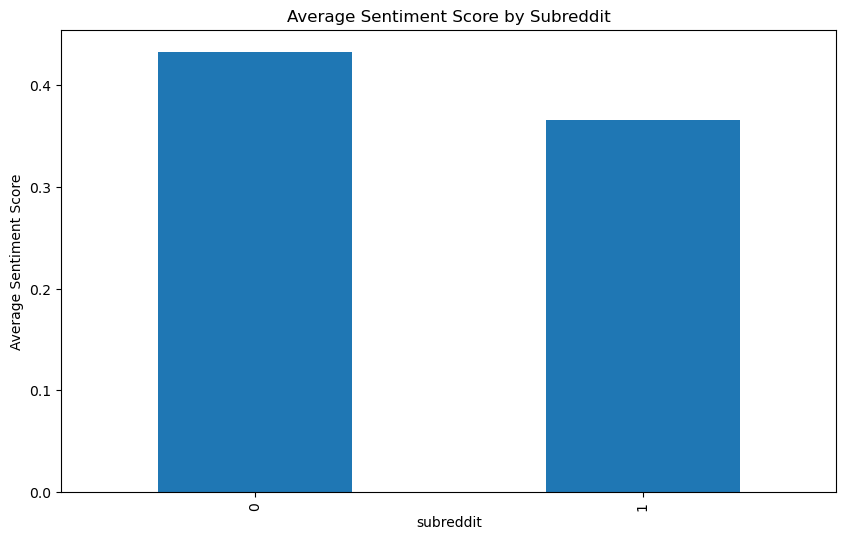

In [232]:
# visuals for sentiment average scores by subreddit
plt.figure(figsize=(10, 6))
subreddit_sentiment['mean'].plot(kind='bar', title='Average Sentiment Score by Subreddit')
plt.ylabel('Average Sentiment Score')
plt.show()

In [233]:
# count the sentiment categories (Positive, Negative, Neutral) per subreddit
sentiment_counts = df.groupby(['subreddit', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts



sentiment,Negative,Neutral,Positive
subreddit,,,
0,190,62,755
1,122,315,666


<Figure size 1200x800 with 0 Axes>

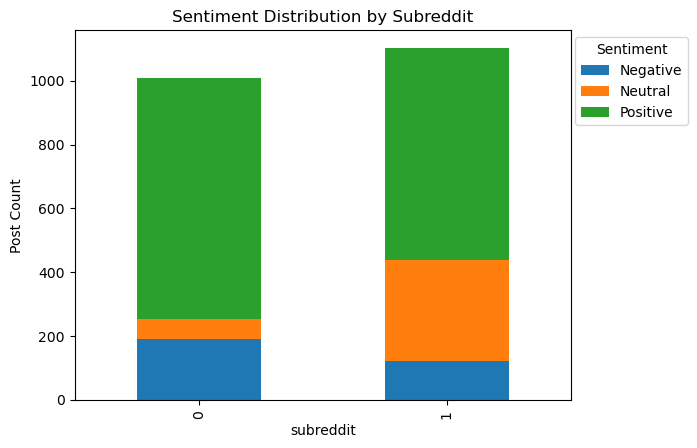

In [234]:
# visuals for sentiment counts per subreddit
plt.figure(figsize=(12,8))
sentiment_counts.plot(kind='bar', stacked=True, title='Sentiment Distribution by Subreddit')
plt.ylabel('Post Count')
plt.legend(title='Sentiment', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show();

In [235]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,sentiment_score,sentiment
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",0.9845,Positive
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,-0.0115,Neutral
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,-0.8515,Negative
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,0.7882,Positive
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,0.9653,Positive


In [236]:
#Finds potential places using NLTK (NNP, NNPS).->source from Google
def find_places(text):

    places = []
    try:
        tokens = nltk.word_tokenize(text)
        tagged = nltk.pos_tag(tokens)
        places = [word for word, tag in tagged if tag == 'NNP' or tag == 'NNPS']
    except TypeError:
        return places
    return places

# create places column in my dataframe
df['places'] = df['combined_text'].apply(find_places)

# Display the DataFrame with the new 'simple_places' column
print(df[['combined_text', 'places']].head())

                                       combined_text  \
0  We've got a free car to travel the USA, we'll ...   
1  Traveling for Work as Extremely Morbidly Obese...   
2  My experience getting TSA precheck (USA). Mayb...   
3  What are some large/capital cities that are ac...   
4  Lost carry-on suitcase waiting for flight at C...   

                                              places  
0  [USA, USA, Australia, LA, New, Orleans, Kansas...  
1    [Work, Morbidly, Obese, Required, ’, ’, Please]  
2        [TSA, USA, TSA, Staples, Has, TSA, Staples]  
3  [NYC, USA, London, UK, Paris, France, Berlin, ...  
4  [Chicago, O'Hare, So, Chicago, LA, American, C...  


In [237]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,sentiment_score,sentiment,places
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",0.9845,Positive,"[USA, USA, Australia, LA, New, Orleans, Kansas..."
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,-0.0115,Neutral,"[Work, Morbidly, Obese, Required, ’, ’, Please]"
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,-0.8515,Negative,"[TSA, USA, TSA, Staples, Has, TSA, Staples]"
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,0.7882,Positive,"[NYC, USA, London, UK, Paris, France, Berlin, ..."
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,0.9653,Positive,"[Chicago, O'Hare, So, Chicago, LA, American, C..."


In [238]:
#source google

In [239]:
df['is_honeymoon'] = df['combined_text'].str.contains('honeymoon', case=False, na=False).astype(int)


# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Helper: Check if a name is a real country
def is_country(name):
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return None

# Extract country-level locations
def extract_honeymoon_data(df):
    honeymoon_df = df[df['is_honeymoon'] == 1]

    def get_countries(places_list):
        if isinstance(places_list, str):
            places_list = json.loads(places_list)
        if isinstance(places_list, list):
            countries = []
            for place in places_list:
                if isinstance(place, str):
                    doc = nlp(place)
                    for ent in doc.ents:
                        if ent.label_ in ["GPE", "LOC"]:
                            country_name = is_country(ent.text)
                            if country_name:
                                countries.append(country_name)
            return countries
        return []

    honeymoon_df = honeymoon_df.copy()
    honeymoon_df['location'] = honeymoon_df['places'].apply(get_countries)
    result_df = honeymoon_df[['location', 'score']].copy()
    return result_df[result_df['location'].astype(bool)]

# Plot top/bottom 5 sentiment countries
def plot_honeymoon_locations(result_df):
    locations = []
    scores = []
    
    for loc_list, score in zip(result_df['location'], result_df['score']):
        for loc in loc_list:
            locations.append(loc)
            scores.append(score)

    plot_df = pd.DataFrame({'location': locations, 'score': scores})

    if plot_df.empty:
        print("No data to plot.")
        return

    # Average sentiment per country
    location_scores = plot_df.groupby('location', as_index=False)['score'].mean()

    # Top 5 countries by sentiment score only
    top5 = location_scores.sort_values(by='score', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='location', y='score', data=top5, palette='viridis')
    plt.title('Top 5 Honeymoon Countries by Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


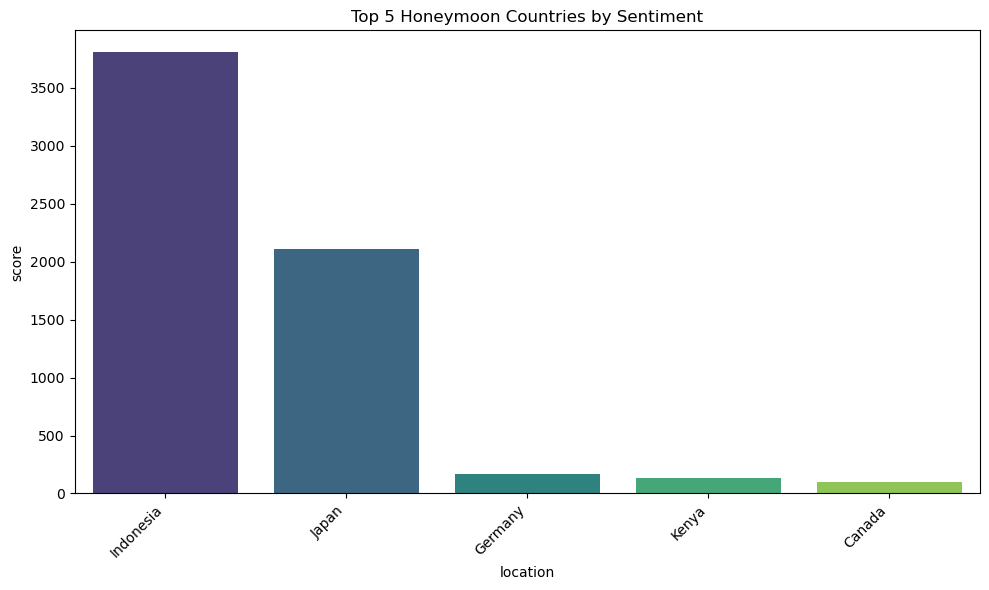

In [240]:
result_df = extract_honeymoon_data(df)
plot_honeymoon_locations(result_df)

In [241]:
#ensamble model
documents = df['combined_text'].fillna('')
X_numerical = df[['score', 'num_comments', 'score']]
# vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_text = tfidf.fit_transform(documents)
# Scaling
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
# combine numerical and categorical features
X_combined = hstack([X_text, X_numerical_scaled])
# target variable
y = df['subreddit']
#split train test dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# Instantiate model
logistic_model = LogisticRegression(random_state=42)
xgboost_model = xgb.XGBClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)
# Create the Voting Classifier
voting_model = VotingClassifier(estimators=[('lr', logistic_model), ('xgboost', xgboost_model), ('svm', svm)], voting='hard')
# Train the model
voting_model.fit(X_train, y_train)
y_train_pred=voting_model.predict(X_train)
accuracy_score(y_train,y_train_pred)
# Predict on the test set
y_pred_voting = voting_model.predict(X_test)
# Evaluate the model
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.8649289099526066
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       201
           1       0.95      0.79      0.86       221

    accuracy                           0.86       422
   macro avg       0.87      0.87      0.86       422
weighted avg       0.88      0.86      0.86       422



### Voting Classifier Performance Summary

The ensemble Voting Classifier achieved the following results:

- **Overall Accuracy**: `0.8649`  
  This means the model correctly predicted the subreddit (Travel or TravelHacks) for approximately 86.5% of the posts in the test set.

#### Classification Report

| Class Label | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| **0 (TravelHacks)** | 0.80 | 0.95 | 0.87 | 201 |
| **1 (Travel)**       | 0.95 | 0.79 | 0.86 | 221 |

- **Precision**: The ability of the classifier not to label a negative sample as positive.  
- **Recall**: The ability of the classifier to find all the positive samples.  
- **F1-Score**: The harmonic mean of precision and recall.

#### Averages:

- **Macro Average** (treats all classes equally):
  - Precision: 0.87
  - Recall: 0.87
  - F1-Score: 0.86

- **Weighted Average** (takes class imbalance into account):
  - Precision: 0.88
  - Recall: 0.86
  - F1-Score: 0.86

These metrics show a strong performance from the Voting Classifier, especially in distinguishing between Travel and TravelHacks posts. Minor trade-offs are observed between precision and recall across the two classes.


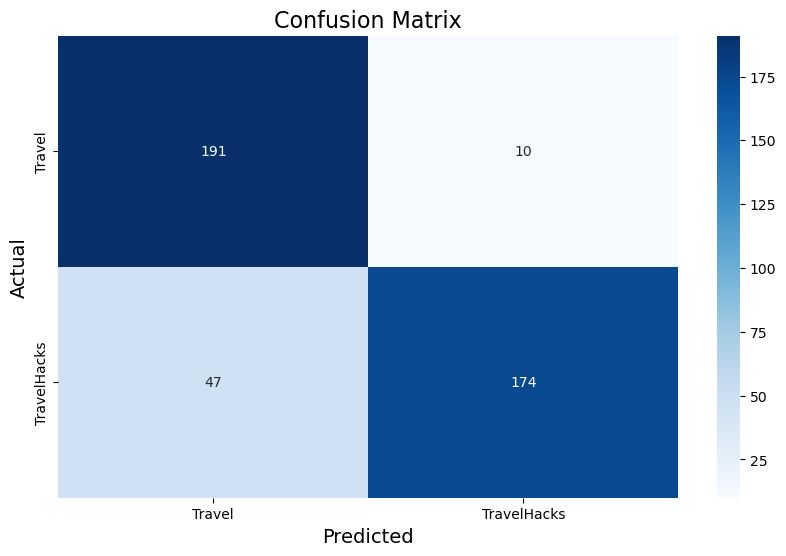

In [242]:
#since this is classification problem i am using confusion matrix
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Travel', 'TravelHacks'], yticklabels=['Travel', 'TravelHacks'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### Confusion Matrix Interpretation

In a binary classification task (e.g., classifying posts as **Travel** or **TravelHacks**), the confusion matrix provides insights into the model's performance:

- **True Positive (TP)**  
  - **Matrix Position**: Top-left corner  
  - The model correctly predicts a post as **Travel** when it is actually a **Travel** post.

- **False Negative (FN)**  
  - **Matrix Position**: Top-right corner  
  - The model incorrectly predicts a **Travel** post as **TravelHacks**.

- **False Positive (FP)**  
  - **Matrix Position**: Bottom-left corner  
  - The model incorrectly predicts a **TravelHacks** post as **Travel**.

- **True Negative (TN)**  
  - **Matrix Position**: Bottom-right corner  
  - The model correctly predicts a post as **TravelHacks** when it is actually a **TravelHacks** post.


In [243]:
df.to_csv('Final Dataset for Modeling.csv', index=False)